In [28]:
import cv2
import numpy as np
from PIL import Image

video_path = '/Users/donglinhan/Desktop/TU2025/1D/48_14-20-02000_LVP0.mp4'

cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

frame_start = 11360
max_start = frame_start - 1000    # <-- beginning of stable lighting
max_end = frame_start + 1000     # <-- end of stable lighting

# === STEP 1: MAX PROJECTION OVER DEFINED RANGE ===
print(f"Creating time-maximum projection from frame {max_start} to {max_end}...")

cap.set(cv2.CAP_PROP_POS_FRAMES, max_start)
max_proj = None

for i in range(max_start, max_end + 1):
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    if not ret:
        break

    if max_proj is None:
        max_proj = frame.copy()
    else:
        max_proj = np.maximum(max_proj, frame)

cv2.imwrite("background_fly.png", max_proj)

frame_start = 29600
max_start = frame_start - 1000    # <-- beginning of stable lighting
max_end = frame_start + 1000     # <-- end of stable lighting

# === STEP 1: MAX PROJECTION OVER DEFINED RANGE ===
print(f"Creating time-maximum projection from frame {max_start} to {max_end}...")

cap.set(cv2.CAP_PROP_POS_FRAMES, max_start)
max_proj = None

for i in range(max_start, max_end + 1):
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    if not ret:
        break

    if max_proj is None:
        max_proj = frame.copy()
    else:
        max_proj = np.maximum(max_proj, frame)

cv2.imwrite("background_walk.png", max_proj)

frame_start = 21000
max_start = frame_start - 1000    # <-- beginning of stable lighting
max_end = frame_start + 1000     # <-- end of stable lighting

# === STEP 1: MAX PROJECTION OVER DEFINED RANGE ===
print(f"Creating time-maximum projection from frame {max_start} to {max_end}...")

cap.set(cv2.CAP_PROP_POS_FRAMES, max_start)
max_proj = None

for i in range(max_start, max_end + 1):
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    if not ret:
        break

    if max_proj is None:
        max_proj = frame.copy()
    else:
        max_proj = np.maximum(max_proj, frame)

cv2.imwrite("background_probe.png", max_proj)

Creating time-maximum projection from frame 10360 to 12360...
Creating time-maximum projection from frame 28600 to 30600...
Creating time-maximum projection from frame 20000 to 22000...


True

In [29]:
import cv2
import numpy as np
import os

# --- CONFIGURATION ---

reference_img_path ="background_fly.png"
output_folder = "diff_frames_fly"
video_path = '/Users/donglinhan/Desktop/TU2025/1D/48_14-20-02000_LVP0.mp4'
start_frame = 11360  # a
end_frame = start_frame + 120   # b
frame_step = 20           # c

# --- LOAD REFERENCE IMAGE ---
ref_img = cv2.imread(reference_img_path)
ref_img_rgb = cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB)

# --- VIDEO CAPTURE SETUP ---
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# --- STORAGE FOR PROJECTIONS ---
processed_frames = []

# --- CREATE OUTPUT FOLDER IF NEEDED ---
os.makedirs(output_folder, exist_ok=True)

# --- PROCESS FRAMES ---
for frame_idx in range(start_frame, min(end_frame + 1, frame_count), frame_step):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    diff = cv2.absdiff(frame_rgb, ref_img_rgb)
    diff = 255 - diff  # flip colors back to dark-on-light
    diff = cv2.convertScaleAbs(diff, alpha=0.9, beta=-10)  # increase contrast

    out_path = os.path.join(output_folder, f"frame_{frame_idx}.png")
    cv2.imwrite(out_path, cv2.cvtColor(diff, cv2.COLOR_RGB2BGR))
    processed_frames.append(diff)

cap.release()
stack = np.stack(processed_frames, axis=0)
min_projection = np.min(stack, axis=0).astype(np.uint8)
cv2.imwrite("min_projection_fly.png", cv2.cvtColor(min_projection, cv2.COLOR_RGB2BGR))

reference_img_path ="background_walk.png"
output_folder = "diff_frames_walk"
video_path = '/Users/donglinhan/Desktop/TU2025/1D/48_14-20-02000_LVP0.mp4'
start_frame = 29600  # a
end_frame = start_frame + 120   # b
frame_step = 20           # c

# --- LOAD REFERENCE IMAGE ---
ref_img = cv2.imread(reference_img_path)
ref_img_rgb = cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB)

# --- VIDEO CAPTURE SETUP ---
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# --- STORAGE FOR PROJECTIONS ---
processed_frames = []

# --- CREATE OUTPUT FOLDER IF NEEDED ---
os.makedirs(output_folder, exist_ok=True)

# --- PROCESS FRAMES ---
for frame_idx in range(start_frame, min(end_frame + 1, frame_count), frame_step):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    diff = cv2.absdiff(frame_rgb, ref_img_rgb)
    diff = 255 - diff  # flip colors back to dark-on-light
    diff = cv2.convertScaleAbs(diff, alpha=0.9, beta=-10)  # increase contrast

    out_path = os.path.join(output_folder, f"frame_{frame_idx}.png")
    cv2.imwrite(out_path, cv2.cvtColor(diff, cv2.COLOR_RGB2BGR))
    processed_frames.append(diff)

cap.release()
stack = np.stack(processed_frames, axis=0)
min_projection = np.min(stack, axis=0).astype(np.uint8)
cv2.imwrite("min_projection_walk.png", cv2.cvtColor(min_projection, cv2.COLOR_RGB2BGR))


reference_img_path ="background_probe.png"
output_folder = "diff_frames_probe"
video_path = '/Users/donglinhan/Desktop/TU2025/1D/48_14-20-02000_LVP0.mp4'
start_frame = 21000  # a
end_frame = start_frame + 120   # b
frame_step = 20           # c

# --- LOAD REFERENCE IMAGE ---
ref_img = cv2.imread(reference_img_path)
ref_img_rgb = cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB)

# --- VIDEO CAPTURE SETUP ---
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# --- STORAGE FOR PROJECTIONS ---
processed_frames = []

# --- CREATE OUTPUT FOLDER IF NEEDED ---
os.makedirs(output_folder, exist_ok=True)

# --- PROCESS FRAMES ---
for frame_idx in range(start_frame, min(end_frame + 1, frame_count), frame_step):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    diff = cv2.absdiff(frame_rgb, ref_img_rgb)
    diff = 255 - diff  # flip colors back to dark-on-light
    diff = cv2.convertScaleAbs(diff, alpha=0.9, beta=-10)  # increase contrast

    out_path = os.path.join(output_folder, f"frame_{frame_idx}.png")
    cv2.imwrite(out_path, cv2.cvtColor(diff, cv2.COLOR_RGB2BGR))
    processed_frames.append(diff)

cap.release()
stack = np.stack(processed_frames, axis=0)
min_projection = np.min(stack, axis=0).astype(np.uint8)
cv2.imwrite("min_projection_probe.png", cv2.cvtColor(min_projection, cv2.COLOR_RGB2BGR))


True

In [61]:
import numpy as np
import pandas as pd

# 1. Load the .npy file (input data)
data = np.load("1D/48_14-20-02000_LVP0-PE-seq_tmp.npy")

# 2. Define items and indices for easy access
items = [
    "proboscis", "head", "thorax", "left_fore_leg1", "left_fore_leg2",
    "right_fore_leg1", "right_fore_leg2", "left_mid_leg1", "left_mid_leg2",
    "right_mid_leg1", "right_mid_leg2", "left_hind_leg1", "left_hind_leg2",
    "right_hind_leg1", "right_hind_leg2", "abdominaltip"
]

# Creating row labels for the body parts (same as in the original code)
item_index = {item: i for i, item in enumerate(items)}

# 3. Initialize a new array to store the transformed data (same shape as original data)
transformed_data = np.zeros_like(data)

# 4. Loop through each frame and apply the transformation
for frame_index in range(data.shape[1]):
    # Get thorax position (translate it to origin)
    thorax_y = data[2 * item_index["thorax"], frame_index]
    thorax_x = data[2 * item_index["thorax"] + 1, frame_index]
    
    # Get proboscis position
    abdominaltip_y = data[2 * item_index["abdominaltip"], frame_index]
    abdominaltip_x = data[2 * item_index["abdominaltip"] + 1, frame_index]

    # Get head position
    head_y = data[2 * item_index["head"], frame_index]
    head_x = data[2 * item_index["head"] + 1, frame_index]
    
    # Translate all points to make the thorax the origin
    translated_x = data[1::2, frame_index] - thorax_x
    translated_y = data[::2, frame_index] - thorax_y
    
    # Calculate the angle between proboscis-thorax and the positive y-axis
    delta_x = head_x - abdominaltip_x  
    delta_y = head_y - abdominaltip_y  
    angle = np.arctan2(delta_x, delta_y)  # Angle of the proboscis-thorax vector
    
    # Rotation matrix (counterclockwise rotation)
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    
    # Apply the rotation to all points
    rotated_points = np.dot(rotation_matrix, np.vstack([translated_x, translated_y]))
    
    # Store the rotated coordinates back into the transformed_data array
    transformed_data[1::2, frame_index] = rotated_points[0]  # X coordinates
    transformed_data[::2, frame_index] = rotated_points[1]  # Y coordinates

# 5. Save the transformed data as a new .npy file
np.save("transformed_coordinates.npy", transformed_data)

# Optional: Convert to a DataFrame for visualization or further processing (if needed)
# Create row labels for body parts (same format as before)
row_label_dict = {}
index = 0
for item in items:
    row_label_dict[index] = f"{item}-x"
    index += 1
    row_label_dict[index] = f"{item}-y"
    index += 1
row_labels = [row_label_dict[i] for i in range(transformed_data.shape[0])]

# Convert to DataFrame (optional)
transformed_df = pd.DataFrame(transformed_data, columns=range(1, transformed_data.shape[1] + 1), index=row_labels)

# Optional: Display the first few rows of the transformed DataFrame
print(transformed_df.head())


             1          2          3          4          5          6      \
proboscis-x   22.0  21.969076  21.969076  21.969076  21.969076  21.969076   
proboscis-y   -1.0  -1.536129  -1.536129  -1.536129  -1.536129  -1.536129   
head-x        11.0  10.996730  10.996730  10.996730  10.996730  10.996730   
head-y        -1.0  -0.268213  -0.268213  -0.268213  -0.268213  -0.268213   
thorax-x       0.0   0.000000   0.000000   0.000000   0.000000   0.000000   

                 7          8      9          10     ...      40256  \
proboscis-x  21.969076  21.969076   22.0  22.968779  ...  20.887524   
proboscis-y  -1.536129  -1.536129    0.0  -1.560512  ...   2.951498   
head-x       10.996730  10.996730   12.0  11.996432  ...  10.943246   
head-y       -0.268213  -0.268213    0.0  -0.292596  ...   1.498453   
thorax-x      0.000000   0.000000    0.0   0.000000  ...   0.000000   

                 40257      40258      40259      40260      40261      40262  \
proboscis-x  20.887524  20.88

(32, 40265)


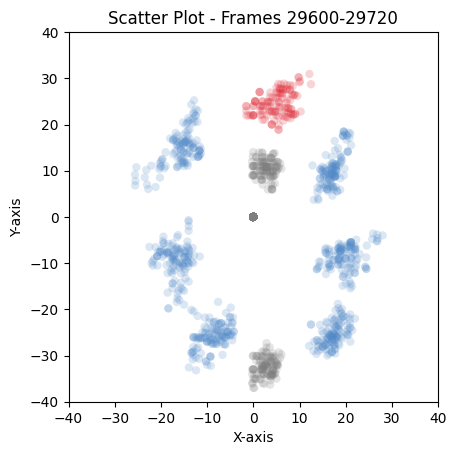

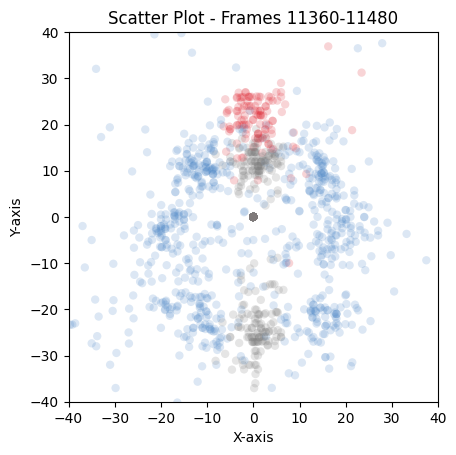

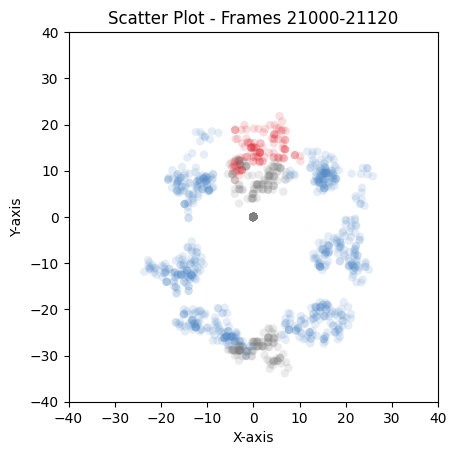

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. import npy data
data = np.load("transformed_coordinates.npy")
print(data.shape)


# 2. generate row name
row_label_dict = {}
index = 0

items = [
    "proboscis", "head", "thorax", "left_fore_leg1", "left_fore_leg2",
    "right_fore_leg1", "right_fore_leg2", "left_mid_leg1", "left_mid_leg2",
    "right_mid_leg1", "right_mid_leg2", "left_hind_leg1", "left_hind_leg2",
    "right_hind_leg1", "right_hind_leg2", "abdominaltip"
]

indexes = [0,2,4,6,10,14,18,22,26, 30]

for item in items:
    row_label_dict[index] = f"{item}-x"
    index += 1
    row_label_dict[index] = f"{item}-y"
    index += 1

row_labels = [row_label_dict[i] for i in range(data.shape[0])]

col_labels = list(range(1, data.shape[1] + 1))

df = pd.DataFrame(data, index=row_labels, columns=col_labels)
df.to_csv("data_with_index.csv")


item_colors = {
    "proboscis": "#DF2935", "head": "#7f7f7f", "thorax": "#7f7f7f",
    "left_fore_leg1": "#528ac8", "left_fore_leg2": "gray",
    "right_fore_leg1": "#528ac8", "right_fore_leg2": "gray",
    "left_mid_leg1": "#528ac8", "left_mid_leg2": "gray",
    "right_mid_leg1": "#528ac8", "right_mid_leg2": "gray",
    "left_hind_leg1": "#528ac8", "left_hind_leg2": "gray",
    "right_hind_leg1": "#528ac8", "right_hind_leg2": "gray",
    "abdominaltip": "#7f7f7f"
}

# Specify the range of frames (columns) to plot
start_frame = 29600  # a
end_frame = start_frame + 120   # b

plt.figure()  # Create a single figure for all frames

for frame_index in range(start_frame, end_frame + 1):
    x = []
    y = []
    colors = []

    for i in indexes:
        y_index = i
        x_index = i + 1
        x.append(data[x_index, frame_index])
        y.append(data[y_index, frame_index])
        item_name = row_label_dict[i].split('-')[0]
        colors.append(item_colors[item_name])

    # Plot with transparency (alpha)
    plt.scatter(x, y, c=colors, alpha=0.2, zorder=1, edgecolor='none')  # Adjust alpha as needed

# Plot options (outside the loop)
plt.title(f"Scatter Plot - Frames {start_frame}-{end_frame}")
#plt.title(f"Scatter Plot - Frames {start_frame}-{end_frame}")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.ylim(-40, 40)
plt.xlim(-40, 40)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('walk-density.pdf')
plt.show()  # Show the combined plot



# Specify the range of frames (columns) to plot
start_frame = 11360  # a
end_frame = start_frame + 120   # b

plt.figure()  # Create a single figure for all frames

for frame_index in range(start_frame, end_frame + 1):
    x = []
    y = []
    colors = []

    for i in indexes:
        y_index = i
        x_index = i + 1
        x.append(data[x_index, frame_index])
        y.append(data[y_index, frame_index])
        item_name = row_label_dict[i].split('-')[0]
        colors.append(item_colors[item_name])

    # Plot with transparency (alpha)
    plt.scatter(x, y, c=colors, alpha=0.2, zorder=1, edgecolor='none')  # Adjust alpha as needed

# Plot options (outside the loop)
plt.title(f"Scatter Plot - Frames {start_frame}-{end_frame}")
#plt.title(f"Scatter Plot - Frames {start_frame}-{end_frame}")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.ylim(-40, 40)
plt.xlim(-40, 40)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('fly-density.pdf')
plt.show()  # Show the combined plot

# Specify the range of frames (columns) to plot
start_frame = 21000  # a
end_frame = start_frame + 120   # b

plt.figure()  # Create a single figure for all frames

for frame_index in range(start_frame, end_frame + 1):
    x = []
    y = []
    colors = []

    for i in indexes:
        y_index = i
        x_index = i + 1
        x.append(data[x_index, frame_index])
        y.append(data[y_index, frame_index])
        item_name = row_label_dict[i].split('-')[0]
        colors.append(item_colors[item_name])

    # Plot with transparency (alpha)
    plt.scatter(x, y, c=colors, alpha=0.15, zorder=1, edgecolor='none')  # Adjust alpha as needed

# Plot options (outside the loop)
plt.title(f"Scatter Plot - Frames {start_frame}-{end_frame}")
#plt.title(f"Scatter Plot - Frames {start_frame}-{end_frame}")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.ylim(-40, 40)
plt.xlim(-40, 40)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('probe-density.pdf')
plt.show()  # Show the combined plot